## Coordinate reference systems

Up to now, we have used the geometry data with certain coordinates without further wondering what those coordinates mean or how they are expressed.

> The **Coordinate Reference System (CRS)** relates the coordinates to a specific location on earth.

For an in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

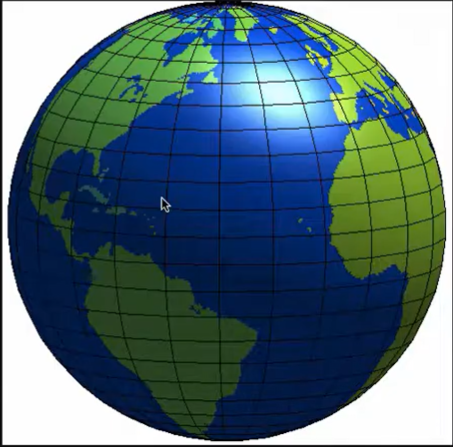

### What is a CRS?

A **Coordinate Reference System (CRS)** is a system that uses coordinates to define locations on the Earth's surface. It combines:
- A **Datum** (which defines the shape and position of the Earth)
- A **Coordinate system** (like latitude/longitude or a projected grid)

There are two main types of CRS:
- **Geographic Coordinate System (GCS)** – uses latitude and longitude based on an ellipsoid
- **Projected Coordinate System (PCS)** – uses a flat, 2D map projection (like UTM, Mercator)

---

### Ellipsoid – *Shape of the Earth*

An **ellipsoid** is a mathematically defined surface that approximates the Earth's shape:
- Flattened at the poles and bulging at the equator
- Defined by a **semi-major axis** (equator) and **semi-minor axis** (pole)

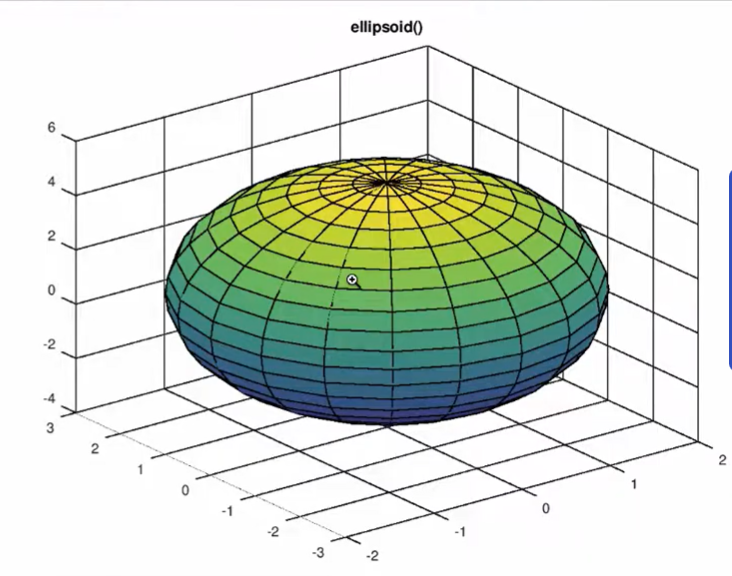

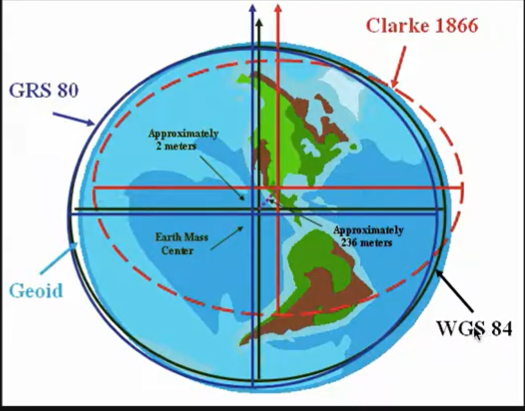

#### Common Reference Ellipsoids:

| Ellipsoid Name       | Year | Major Axis (a)     | Flattening (f)         | Used In               |
|----------------------|------|--------------------|-------------------------|------------------------|
| Clarke 1866          | 1866 | 6,378,206.4 m      | 1/294.9786982           | NAD27 (North America) |
| GRS80                | 1980 | 6,378,137.0 m      | 1/298.257222101         | NAD83                 |
| WGS84                | 1984 | 6,378,137.0 m      | 1/298.257223563         | GPS, global systems   |
| Airy 1830            | 1830 | 6,377,563.396 m    | 1/299.3249646           | OSGB36 (UK)           

---

### Datum – *Where the Ellipsoid Goes*

A **datum** positions the ellipsoid on the real Earth. It defines:
- The ellipsoid used
- The origin and orientation
- Adjustments (translation, rotation, scale)



---

### CRS Examples:

| CRS Name           | Type        | Datum     | EPSG Code | Use Case                        |
|--------------------|-------------|-----------|-----------|---------------------------------|
| WGS 84             | Geographic  | WGS84     | EPSG:4326 | GPS, global maps                |
| NAD83              | Geographic  | NAD83     | EPSG:4269 | North American mapping          |
| UTM Zone 33N       | Projected   | WGS84     | EPSG:32633| Local 2D mapping in Europe/Africa|
| Web Mercator       | Projected   | WGS84     | EPSG:3857 | Web maps (Google Maps, etc.)    |

---

### EPSG Codes – *Standard for Spatial Reference Systems*

**EPSG** stands for **European Petroleum Survey Group**.  
It provides a unique numeric identifier for each CRS, datum, projection, or coordinate transformation.

These codes are used in GIS tools like QGIS, ArcGIS, PostGIS, and GeoPandas to:
- Specify spatial reference systems
- Ensure standardization and compatibility
- Transform or reproject data accurately

### Common EPSG Codes:

| EPSG Code | Name                 | Description                          |
|-----------|----------------------|--------------------------------------|
| 4326      | WGS 84               | Geographic CRS used by GPS (lat/lon) |
| 3857      | Web Mercator         | Used in most web maps (Google Maps)  |
| 4269      | NAD83                | North American Datum 1983            |
| 32633     | UTM Zone 33N (WGS84) | Projected CRS for Europe/Africa zone |

---

### Summary

- **Ellipsoid** defines the *shape* of the Earth.
- **Datum** defines *where the ellipsoid fits* in space.
- **CRS** combines both to allow mapping and coordinate systems.
- **EPSG codes** uniquely identify and standardize CRSs across platforms.

### Geographic coordinates

> Degrees of latitude and longitude.
>
> E.g. 48°51′N, 2°17′E

The most known type of coordinates are geographic coordinates: we define a position on the globe in degrees of latitude and longitude, relative to the equator and the prime meridian. 
With this system, we can easily specify any location on earth. It is used widely, for example in GPS. If you inspect the coordinates of a location in Google Maps, you will also see latitude and longitude.

### Projected coordinates

> `(x, y)` coordinates are usually in meters or feet

Although the earth is a globe, in practice we usually represent it on a flat surface: think about a physical map, or the figures we have made with Python on our computer screen.
Going from the globe to a flat map is what we call a *projection*.

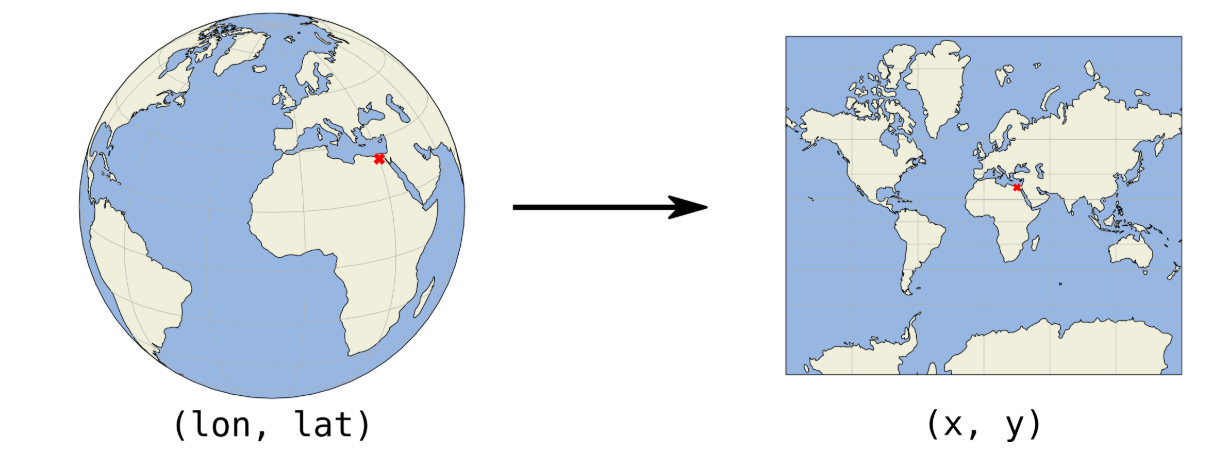

We project the surface of the earth onto a 2D plane so we can express locations in cartesian x and y coordinates, on a flat surface. In this plane, we then typically work with a length unit such as meters instead of degrees, which makes the analysis more convenient and effective.

However, there is an important remark: the 3 dimensional earth can never be represented perfectly on a 2 dimensional map, so projections inevitably introduce distortions. To minimize such errors, there are different approaches to project, each with specific advantages and disadvantages.

Some projection systems will try to preserve the area size of geometries, such as the Albers Equal Area projection. Other projection systems try to preserve angles, such as the Mercator projection, but will see big distortions in the area. Every projection system will always have some distortion of area, angle or distance.

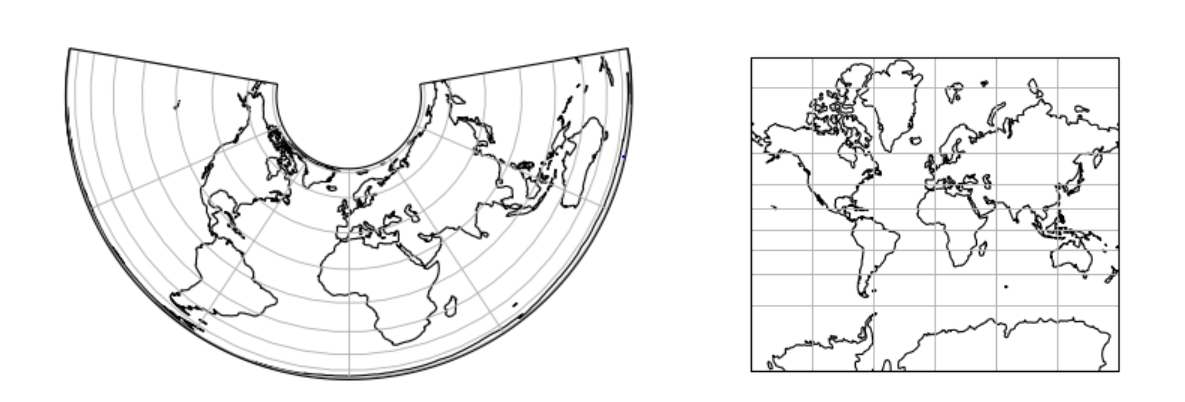

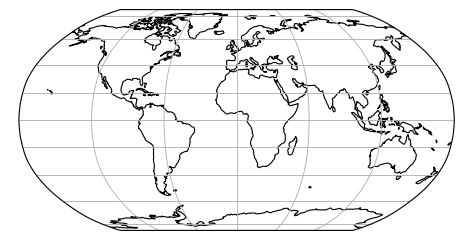

There are several types of projections:
- **Cylindrical Projection**: Like the Mercator projection.
- **Conic Projection**: Used for mid-latitude areas, like Albers Equal Area.
- **Azimuthal Projection**: Useful for polar regions.

In [2]:
import pandas as pd
import geopandas as gpd


In [3]:
# Load the shapefile
world = gpd.read_file("world_countries/ne_10m_admin_0_countries.shp")

# Show the first few rows
print(world.head())

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

### Coordinate Reference Systems in Python / GeoPandas

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds a description of the coordinate reference system of the geometries:

In [4]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For the countries dataframe, it indicates that it uses the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used for geographic coordinates.

### Transforming to another CRS

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

### Why using a different CRS?

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- Different sources with different CRS -> need to convert to the same crs

    ```python
    df1 = geopandas.read_file(...)
    df2 = geopandas.read_file(...)

    df2 = df2.to_crs(df1.crs)
    ```

- Mapping (distortion of shape and distances)

- Distance / area based calculations -> ensure you use an appropriate projected coordinate system expressed in a meaningful unit such as meters or feet (not degrees).

<div class="alert alert-info" style="font-size:120%">

**ATTENTION:**

All the calculations that happen in GeoPandas and Shapely assume that your data is in a 2D cartesian plane, and thus the result of those calculations will only be correct if your data is properly projected.

</div>